In [1]:
# Imports
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Load cleaned dataset
df = pd.read_csv("/Users/thomassimmons/c/GymDataJul2025/Data/Cleaned_Synthetic_Gym_Check-ins.csv")

In [3]:
# Check dataset
df.head()

,Unnamed: 0,timestamp,student_id,activity_type,duration_minutes,day_of_week
0,0,2025-06-01 19:07:00,S0167,yoga,69,Sunday
1,1,2025-06-01 19:57:00,S0104,swimming,85,Sunday
2,2,2025-06-01 17:50:00,S0142,elliptical,80,Sunday
3,3,2025-06-01 12:11:00,S0060,treadmill,78,Sunday
4,4,2025-06-01 09:27:00,S0173,yoga,61,Sunday


In [4]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'student_id', 'activity_type',
       'duration_minutes', 'day_of_week'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0           int64
timestamp           object
student_id          object
activity_type       object
duration_minutes     int64
day_of_week         object
dtype: object

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

In [8]:
df['date']

0       2025-06-01
1       2025-06-01
2       2025-06-01
3       2025-06-01
4       2025-06-01
           ...    
4309    2025-06-30
4310    2025-06-30
4311    2025-06-30
4312    2025-06-30
4313    2025-06-30
Name: date, Length: 4314, dtype: object

In [9]:
df.describe(include='all')

,Unnamed: 0,timestamp,student_id,activity_type,duration_minutes,day_of_week,hour,date
count,4314.00000,4314,4314,4314,4314.000000,4314,4314.000000,4314
unique,NaN,NaN,300,5,NaN,7,NaN,30
top,NaN,NaN,S0047,swimming,NaN,Monday,NaN,2025-06-02
freq,NaN,NaN,25,897,NaN,859,NaN,199
mean,2156.50000,2025-06-15 22:05:54.158553600,NaN,NaN,55.114279,NaN,14.559805,NaN
min,0.00000,2025-06-01 06:48:00,NaN,NaN,20.000000,NaN,6.000000,NaN
25%,1078.25000,2025-06-08 08:48:00,NaN,NaN,37.000000,NaN,9.000000,NaN
50%,2156.50000,2025-06-15 16:50:00,NaN,NaN,55.000000,NaN,17.000000,NaN
75%,3234.75000,2025-06-23 17:27:45,NaN,NaN,72.000000,NaN,18.000000,NaN
max,4313.00000,2025-06-30 20:54:00,NaN,NaN,90.000000,NaN,20.000000,NaN


In [10]:
df['activity_type'].value_counts()

activity_type
swimming      897
yoga          881
weights       875
treadmill     861
elliptical    800
Name: count, dtype: int64

In [11]:
df.groupby('activity_type')['duration_minutes'].mean().sort_values(ascending=False)

activity_type
treadmill     56.292683
yoga          55.572077
elliptical    55.070000
swimming      54.609810
weights       54.051429
Name: duration_minutes, dtype: float64

In [12]:
# Most active students
df['student_id'].value_counts().head(10)

student_id
S0047    25
S0196    25
S0238    23
S0168    23
S0268    23
S0194    23
S0102    23
S0248    23
S0273    23
S0184    22
Name: count, dtype: int64

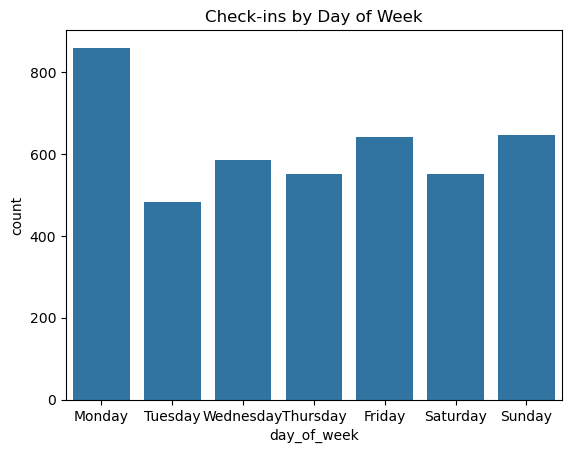

In [13]:
sns.countplot(x='day_of_week', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Check-ins by Day of Week')
plt.show()

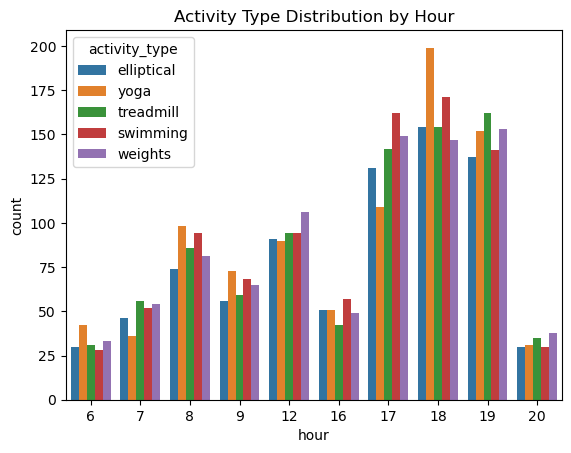

In [14]:
sns.countplot(x='hour', hue='activity_type', data=df)
plt.title('Activity Type Distribution by Hour')
plt.show()

<Axes: xlabel='activity_type', ylabel='day_of_week'>

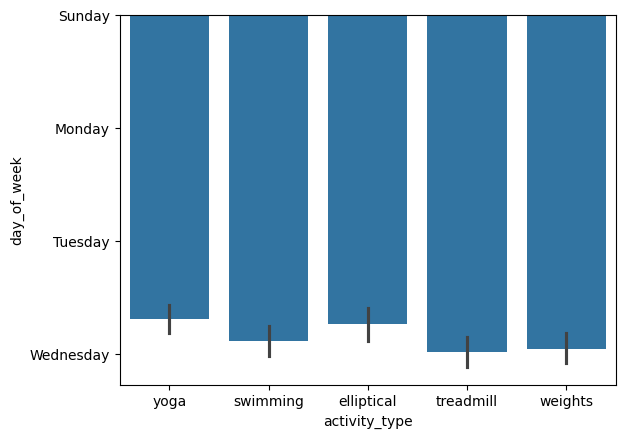

In [25]:
sns.barplot(x='activity_type', y= 'day_of_week', data=df)

In [21]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'student_id', 'activity_type',
       'duration_minutes', 'day_of_week', 'hour', 'date'],
      dtype='object')